In [106]:
#1.Import the relevant libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
# 2. Load data

In [109]:
X = np.array([[3, 12], [6, 9], [4.5, 12], [12, 3], [15, 6], [12, 5], [9, 18], [9, 12]])
X.shape

(8, 2)

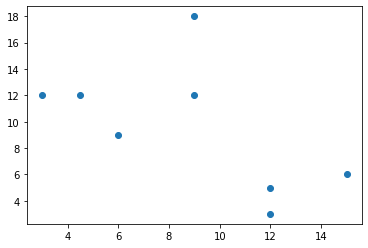

In [110]:
plt.scatter(X[:,0], X[:,1])

In [111]:
# 3 Choose K centroids

In [112]:
def initialize_K_centroids(X, K):
    m,n = X.shape
    k_rand = np.ones((K, n))
    k_rand = X[np.random.choice(range(len(X)), K, replace=False),:]
    return k_rand

In [113]:
centroids_init = initialize_K_centroids(X, 3)

In [114]:
centroids_init

array([[ 6.,  9.],
       [12.,  3.],
       [ 9., 18.]])

In [115]:
# 4 Compute distances

In [116]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        c[i] = np.argmin(distances)
    return c

In [117]:
idx = find_closest_centroids(X, centroids_init)
idx

array([0., 0., 0., 1., 1., 1., 2., 0.])

In [118]:
# 5 Update centroids

In [119]:
def compute_means(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points_belong_k = X[np.where(idx == k)]
        centroids[k] = np.mean(points_belong_k, axis=0,)
    return centroids

In [120]:
centroids = compute_means(X, idx, 3)
centroids

array([[ 5.625     , 11.25      ],
       [13.        ,  4.66666667],
       [ 9.        , 18.        ]])

In [121]:
# 6 

In [122]:
def find_k_means(X, K, max_iters=10):
    _, n = X.shape
    centroids = initialize_K_centroids(X, K) 
    centroid_history = np.zeros((max_iters, K, n))
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
    
    return centroids, idx

In [123]:
centroids, idx = find_k_means(X, 3)

In [124]:
centroids

array([[ 5.625     , 11.25      ],
       [ 9.        , 18.        ],
       [13.        ,  4.66666667]])

In [125]:
idx

array([0., 0., 0., 2., 2., 2., 1., 0.])